# Bài 1 
Tính khoảng cách edit

1. `dp = [[0]*(len(source_string) + 1) for i in range(len(target_string) + 1)]`: Khởi tạo ma trận DP (Programming Dynamic) với kích thước (len(target_string) + 1) x (len(source_string) + 1) và giá trị ban đầu 0.

2. `for i in range(1, len(target_string) + 1): dp[i][0] = dp[i - 1][0] + 1`: Điền giá trị ban đầu cho cột đầu tiên của ma trận DP bằng cách tăng dần giá trị lên 1 với mỗi hàng mới.

3. `for i in range(1, len(source_string) + 1): dp[0][i] = dp[0][i - 1] + 1`: Điền giá trị ban đầu cho hàng đầu tiên của ma trận DP bằng cách tăng dần giá trị lên 1 với mỗi cột mới.

4. `operations_performed = []`: Khởi tạo danh sách các phép biến đổi chuỗi để từ chuỗi nguồn biến thành chuỗi đích.

5. `for i in range(1, len(target_string) + 1): for j in range(1, len(source_string) + 1): ...`: Tính giá trị của ma trận DP bằng cách so sánh kí tự tại vị trí i-1 của chuỗi đích và j-1 của chuỗi nguồn. Nếu hai kí tự bằng nhau thì lấy giá trị ở ô bên trên và bên trái, nếu khác nhau thì lấy giá trị tối thiểu của ba ô bên trên, bên trái, và bên trên trái cộng thêm 1 hoặc 2 (tương ứng với phép thay thế và phép xoá/chèn).

6. `while (i != 0 and j != 0): ...`: Truy vết ngược lại từ ô cuối cùng của ma trận DP đến ô đầu tiên để xác định danh sách các phép biến đổi để từ chuỗi nguồn biến thành chuỗi đích.

7. `while (j != 0): ...`: Xóa các kí tự còn lại của chuỗi nguồn.

8. `while (i != 0): ...`: Chèn các kí tự còn lại cho chuỗi đích.

9. `operations_performed`: Đảo ngược danh sách các phép biển đổi

10. `return [dp[len(target_string)][len(source_string)], operations_performed]` : Trả về khoảng cách edit cũng như danh sách các phép biến đổi tương ứng

In [1]:
def find_minimum_edit_distance(source_string, target_string):
    # Khởi tạo ma trận DP với kích thước (len(target_string) + 1) x (len(source_string) + 1) và giá trị 0
    dp = [[0]*(len(source_string) + 1) for i in range(len(target_string) + 1)]
    
    # Điền giá trị ban đầu cho cột đầu tiên của ma trận DP
    for i in range(1, len(target_string) + 1):
        dp[i][0] = dp[i - 1][0] + 1
    
    # Điền giá trị ban đầu cho hàng đầu tiên của ma trận DP
    for i in range(1, len(source_string) + 1):
        dp[0][i] = dp[0][i - 1] + 1
    
    # Khởi tạo danh sách các phép biến đổi chuỗi để từ chuỗi nguồn biến thành chuỗi đích
    operations_performed = []
    
    # Tính giá trị của ma trận DP bằng cách so sánh kí tự tại vị trí i-1 của chuỗi đích và j-1 của chuỗi nguồn
    # Nếu hai kí tự bằng nhau thì lấy giá trị ở ô bên trên và bên trái, nếu khác nhau thì lấy giá trị tối thiểu của 
    # ba ô bên trên, bên trái, và bên trên trái cộng thêm 1 hoặc 2 (tương ứng với phép thay thế và phép xoá/chèn)
    for i in range(1, len(target_string) + 1):
        for j in range(1, len(source_string) + 1):
            if source_string[j - 1] == target_string[i-1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = min(dp[i - 1][j] + 1,
                               dp[i - 1][j - 1] + 2,
                               dp[i][j - 1] + 1)
    
    # Truy vết ngược lại từ ô cuối cùng của ma trận DP đến ô đầu tiên để xác định danh sách các phép biến đổi
    # để từ chuỗi nguồn biến thành chuỗi đích
    i = len(target_string)
    j = len(source_string)
    while (i != 0 and j != 0):
        if target_string[i-1] == source_string[j-1]:
            i -= 1
            j -= 1
        else:
            if dp[i][j] == dp[i - 1][j - 1]+2:
                operations_performed.append(
                    ('SUBSTITUTE', source_string[j-1], target_string[i - 1]))
                i -= 1
                j -= 1
            elif dp[i][j] == dp[i - 1][j]+1:
                operations_performed.append(('INSERT', target_string[i - 1]))
                i -= 1
            else:
                operations_performed.append(('DELETE', source_string[j - 1]))
                j -= 1
    # Xóa các kí tự còn lại của chuỗi nguồn
    while (j != 0):
        operations_performed.append(('DELETE', source_string[j-1]))
        j -= 1
    # Chèn các kí tự còn lại cho chuỗi đích
    while (i != 0):
        operations_performed.append(('INSERT', target_string[i-1]))
        i -= 1
    # Đảo ngược danh sách operation_performed
    operations_performed.reverse()
    return [dp[len(target_string)][len(source_string)], operations_performed]


Tạo các test cases để kiểm tra tính đúng đắn của hàm trong các trường hợp khác nhau :

In [2]:
# Test case khi chuỗi rỗng:
source_string = ""
target_string = ""
assert find_minimum_edit_distance(source_string, target_string) == [0, []]

# Test case khi chuỗi giống nhau:
source_string = "hello"
target_string = "hello"
assert find_minimum_edit_distance(source_string, target_string) == [0, []]

# Test case khi chuỗi khác nhau một ký tự:
source_string = "hello"
target_string = "hella"
assert find_minimum_edit_distance(source_string, target_string) == [2, [('SUBSTITUTE', 'o', 'a')]]

# Test case khi chuỗi khác nhau nhiều ký tự:
source_string = "kitten"
target_string = "sitting"
assert find_minimum_edit_distance(source_string, target_string) == [5, [('SUBSTITUTE', 'k', 's'), ('SUBSTITUTE', 'e', 'i'), ('INSERT', 'g')]]

# Test case khi chuỗi đích rỗng:
source_string = "hello"
target_string = ""
assert find_minimum_edit_distance(source_string, target_string) == [5, [('DELETE', 'h'), ('DELETE', 'e'), ('DELETE', 'l'), ('DELETE', 'l'), ('DELETE', 'o')]]

# Test case khi chuỗi nguồn rỗng:
source_string = ""
target_string = "hello"
assert find_minimum_edit_distance(source_string, target_string) == [5, [('INSERT', 'h'), ('INSERT', 'e'), ('INSERT', 'l'), ('INSERT', 'l'), ('INSERT', 'o')]]

# Test case khi chuỗi khác độ dài:
source_string = "kitten"
target_string = "kit"
assert find_minimum_edit_distance(source_string, target_string) == [3, [('DELETE', 't'), ('DELETE', 'e'), ('DELETE', 'n')]]




# Bài 2
Tính khoảng cách dãy con chung dài nhất Longest Common Subsequence (LCSS)

- Tạo một ma trận `dp` với giá trị ban đầu là 0, có kích thước `(n+1) x (m+1)` với `n` và `m` là độ dài của `target_string` và `source_string` tương ứng. `dp[i][j]` sẽ lưu độ dài của LCS của `source_string` có độ dài `j` và `target_string` có độ dài `i`.
- Khởi tạo dãy con chung dài nhất ban đầu là rỗng.
- Dùng thuật toán lập bảng độ dài của LCS bằng cách duyệt qua từng cặp kí tự của hai chuỗi `source_string` và `target_string`, và thực hiện theo công thức sau:
    - Nếu kí tự cuối cùng của `source_string` và `target_string` là giống nhau, thì `dp[i][j]` sẽ bằng `dp[i-1][j-1]` cộng thêm 1.
    - Nếu kí tự cuối cùng của `source_string` và `target_string` không giống nhau, thì `dp[i][j]` sẽ bằng giá trị lớn nhất của `dp[i-1][j]` và `dp[i][j-1]`.
- Sau khi hoàn thành lập bảng `dp`, ta sẽ xác định LCS bằng cách lần ngược lại bảng `dp`. Bắt đầu từ `dp[n][m]` (độ dài của LCS), ta sẽ kiểm tra từng cặp kí tự của `source_string` và `target_string`:
    - Nếu kí tự cuối cùng của `source_string` và `target_string` giống nhau, ta sẽ thêm kí tự đó vào LCS và giảm chỉ số của cả hai chuỗi đi 1.
    - Nếu `dp[i-1][j]` lớn hơn `dp[i][j-1]` thì ta giảm chỉ số của `target_string` đi 1.
    - Ngược lại, ta giảm chỉ số của `source_string` đi 1.
- Kết quả trả về bao gồm độ dài của LCS và LCS đó.

In [3]:
def find_longest_common_subsequence(source_string, target_string):
    # Độ dài của source_string
    m = len(source_string)
    # Độ dài của target_string
    n = len(target_string)
    # Tạo ma trận dp có kích thước (n+1)x(m+1) với các giá trị ban đầu bằng 0
    dp = [[0]*(m + 1) for i in range(n + 1)]
    # Khởi tạo dãy con chung dài nhất ban đầu là rỗng
    subsequence = ''

    # Dùng thuật toán lập bảng độ dài của dãy con chung dài nhất (LCS)
    for i in range(1, n + 1):
        for j in range(1, m+1):
            if source_string[j - 1] == target_string[i-1]:
                # Nếu hai kí tự cuối của hai chuỗi bằng nhau thì tăng độ dài của LCS lên 1
                dp[i][j] = dp[i - 1][j - 1]+1
            else:
                # Ngược lại, lấy giá trị lớn nhất của LCS từ hai trường hợp trước đó
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])

    # Xác định LCS bằng cách lần ngược lại bảng dp
    i = n
    j = m
    while i != 0 and j != 0:
        if source_string[j-1] == target_string[i-1]:
            # Nếu hai kí tự cuối của hai chuỗi bằng nhau, thêm kí tự này vào LCS
            subsequence += source_string[j-1]
            i -= 1
            j -= 1
        elif dp[i-1][j] == dp[i][j-1]+1:
            # Nếu giá trị trên hàng trên của dp lớn hơn giá trị bên trái, giảm chỉ số hàng
            i -= 1
        else:
            # Ngược lại, giảm chỉ số cột
            j -= 1

    # Trả về độ dài của LCS và LCS đó
    return dp[n][m], subsequence[::-1]


Tạo các test cases để kiểm tra tính đúng đắn của hàm trong các trường hợp khác nhau :

In [4]:
# Test case khi hai chuỗi rỗng:
source_string = ""
target_string = ""
assert find_longest_common_subsequence(source_string, target_string) == (0, '')

# Test case khi hai chuỗi giống nhau:
source_string = "hello"
target_string = "hello"
assert find_longest_common_subsequence(source_string, target_string) == (5, 'hello')

# Test case khi hai chuỗi không có chuỗi con chung:
source_string = "abc"
target_string = "def"
assert find_longest_common_subsequence(source_string, target_string) == (0, '')

# Test case khi hai chuỗi có một ký tự chung:
source_string = "abcde"
target_string = "vwxyzc"
assert find_longest_common_subsequence(source_string, target_string) == (1, 'c')

# Test case khi hai chuỗi có nhiều chuỗi con chung cùng độ dài:
source_string = "abcbdab"
target_string = "bdcaba"
assert find_longest_common_subsequence(source_string, target_string) == (4, 'bcba')

# Test case khi chuỗi đích rỗng:
source_string = "hello"
target_string = ""
assert find_longest_common_subsequence(source_string, target_string) == (0, '')

# Test case khi chuỗi nguồn rỗng:
source_string = ""
target_string = "hello"
assert find_longest_common_subsequence(source_string, target_string) == (0, '')

# Test case giống trong file pdf:
source_string = "ACADB"
target_string = "CBDA"
assert find_longest_common_subsequence(source_string, target_string) == (2, 'CA')

# Bài 3
Tính khoảng cách biến đổi thời gian động (Dynamic Time Warping - DTW)

- `m` là độ dài của chuỗi thứ nhất
- `n` là độ dài của chuỗi thứ hai.
- `dp` là một mảng hai chiều, được khởi tạo tất cả các phần tử là 0, với kích thước `(m, n)`.
- Trong vòng lặp đầu tiên, các phần tử đầu tiên của mảng `dp` được tính toán theo công thức: `dp[i][0] = abs(series_1[i]-series_2[0])+dp[i-1][0]`. Nó tương đương với tính khoảng cách DTW giữa từng phần tử của chuỗi 1 với phần tử đầu tiên của chuỗi 2.
- Trong vòng lặp thứ hai, các phần tử đầu tiên của mảng `dp` được tính toán theo công thức: `dp[0][i] = abs(series_2[i]-series_1[0])+dp[0][i-1]`. Nó tương đương với tính khoảng cách DTW giữa phần tử đầu tiên của chuỗi 1 với từng phần tử của chuỗi 2.
- Trong vòng lặp thứ ba, khoảng cách DTW giữa các phần tử của hai chuỗi được tính toán dựa trên các phần tử xung quanh của mảng `dp`. Cụ thể, `dp[i][j]` tương đương với khoảng cách DTW giữa `series_1[i]` và `series_2[j]`. Công thức tính `dp[i][j]` là `abs(series_1[i]-series_2[j]) + min(dp[i-1][j], dp[i][j-1], dp[i-1][j-1])`, trong đó `min(dp[i-1][j], dp[i][j-1], dp[i-1][j-1])` tương đương với khoảng cách DTW nhỏ nhất giữa `series_1[i]` và `series_2[j]` bằng cách di chuyển từ một trong ba ô xung quanh (trái, trên, trái trên).
- Sau đó, em sẽ đảo ngược mảng `dp` chiều dọc để giống kết quả trong file pdf.
- Biến `i` được khởi tạo là 0 và biến `j` được khởi tạo là `n-1`. `warp_path` được khởi tạo với một cặp `(i, j)` để lưu lộ trình đi theo tọa độ Oxy tương ứng với ma trận dp.
- Trong vòng lặp cuối cùng, lộ trình chiều dọc được tạo ra bằng cách di chuyển từ `(0, n-1)` đến `(m-1, 0)` theo quy tắc: chọn ô xung quanh có khoảng cách DTW nhỏ nhất và thêm vào `warp_path`.
- Cuối cùng, hàm trả về mảng `dp` và `warp_path`.

In [5]:
def find_DTW(series_1, series_2):
    # Lấy độ dài của chuỗi thứ nhất và chuỗi thứ hai
    m = len(series_1)
    n = len(series_2)
    # Trường hợp nếu một trong 2 chuỗi rỗng
    if m==0 or n== 0:
        return [],[]
    # Khởi tạo mảng dp với tất cả giá trị ban đầu bằng 0
    dp = [[0]*n for i in range(m)]
    dp[0][0]=abs(series_1[0]-series_2[0])
    # Tính toán các giá trị cho hàng đầu tiên và cột đầu tiên của dp
    # dựa trên giá trị tuyệt đối của sự khác biệt giữa các phần tử trong hai chuỗi
    for i in range(1, m):
        dp[i][0] = abs(series_1[i]-series_2[0])+dp[i-1][0]
    for i in range(1, n):
        dp[0][i] = abs(series_2[i]-series_1[0])+dp[0][i-1]

    # Tính toán giá trị cho các phần tử còn lại của dp
    for i in range(1, m):
        for j in range(1, n):
            dp[i][j] = abs(series_1[i]-series_2[j]) + \
                min(dp[i-1][j], dp[i][j-1], dp[i-1][j-1])

    # Đảo ngược ma trận dp để thuận tiện cho việc tìm đường đi nhỏ nhất
    dp = dp[::-1]

    # Tìm đường đi nhỏ nhất thông qua ma trận dp và lưu vào mảng warp_path
    i = 0
    j = n-1
    warp_path = [(i, j)]
    while i != m-1 and j != 0:
        if min(dp[i+1][j], dp[i][j-1], dp[i+1][j-1]) == dp[i+1][j-1]:
            warp_path.append((i+1, j-1))
            i += 1
            j -= 1
        elif min(dp[i+1][j], dp[i][j-1], dp[i+1][j-1]) == dp[i+1][j]:
            warp_path.append((i+1, j))
            i += 1
        else:
            warp_path.append((i, j-1))
            j -= 1

    # Thêm điểm cuối cùng vào mảng warp_path
    warp_path.append((m-1, 0))
    return dp, warp_path


Hàm vẽ ma trận ma trận khoảng cách thời gian động và đường đi warping

In [6]:
import seaborn as sbn
import matplotlib.pyplot as plt
def plot_warp_path(cost_matrix,warp_path):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax = sbn.heatmap(cost_matrix, annot=True, square=True, linewidths=0.1, cmap="YlGnBu", ax=ax)
    # ax.invert_yaxis()
    # Get the warp path in x and y directions
    path_x = [p[1] for p in warp_path]
    path_y = [p[0] for p in warp_path]

    # Align the path from the center of each cell
    path_xx = [x+0.5 for x in path_x]
    path_yy = [y+0.5 for y in path_y]

    ax.plot(path_xx, path_yy, color='blue', linewidth=3, alpha=0.2)

Tạo các test cases để kiểm tra tính đúng đắn của hàm trong các trường hợp khác nhau :
- Với các test case 1, 2 ,3 là các test case đơn giản nên em sẽ check trực tiếp
- Với các test case 4, 5 ,6 ,7 phức tạp hơn thì em sẽ hình để check

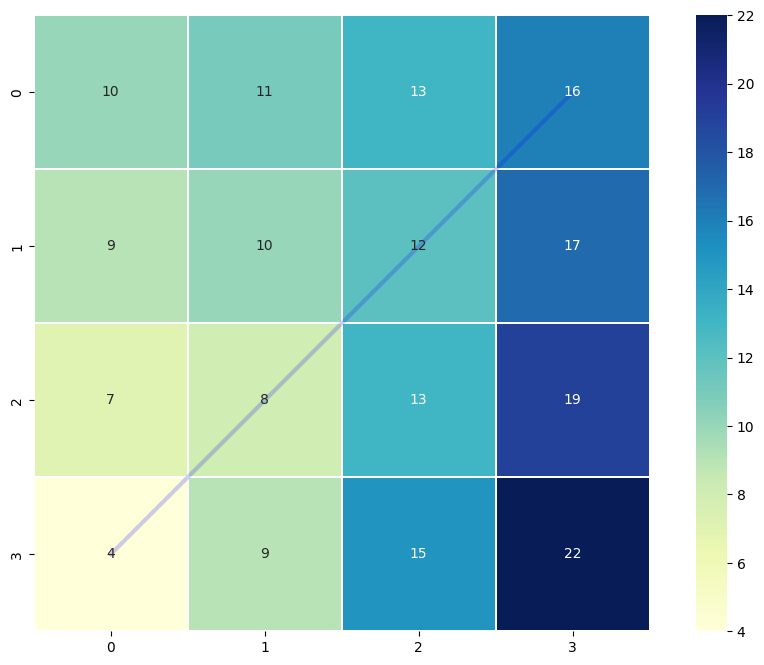

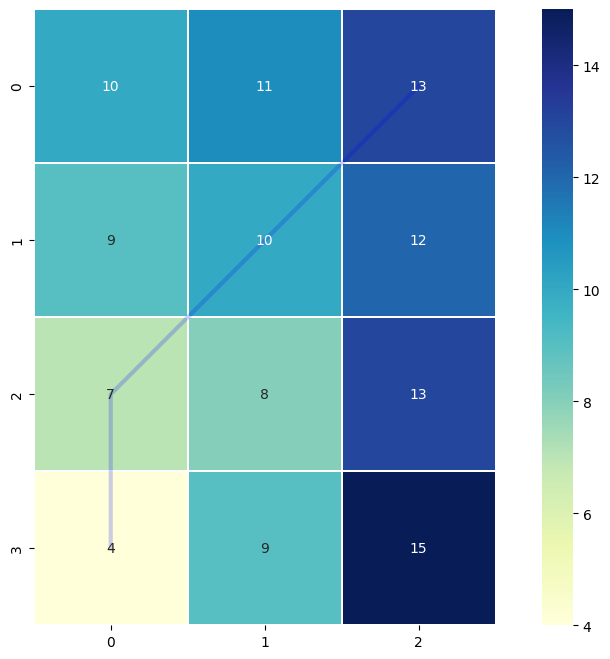

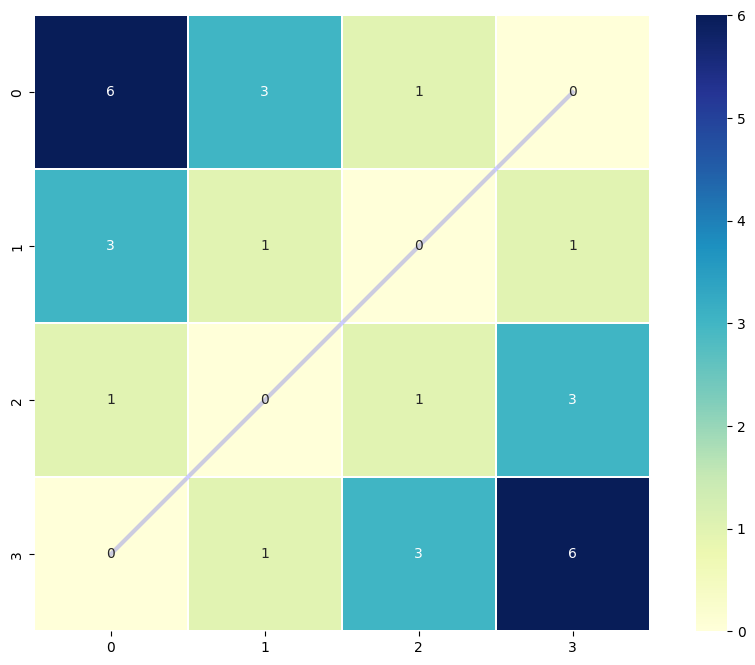

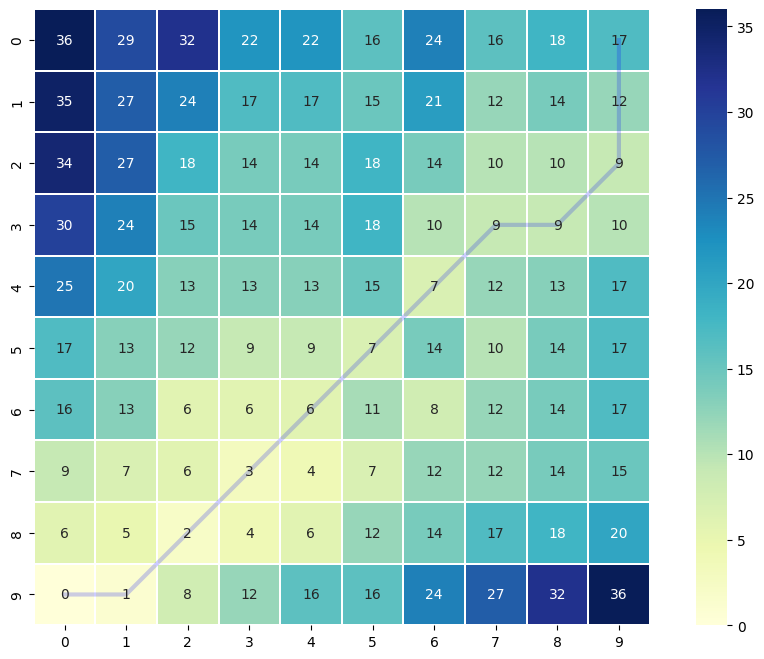

In [7]:
# Test case hai chuỗi đều rỗng.
series_1 = []
series_2 = []
assert find_DTW(series_1, series_2) == ([], [])
# Test case một chuỗi rỗng, một chuỗi khác không rỗng.
series_1 = []
series_2 = [1, 2, 3, 4]
assert find_DTW(series_1, series_2) == ([], [])

# Test case hai chuỗi đều có độ dài bằng 1
series_1 = [1]
series_2 = [2]
assert find_DTW(series_1, series_2) == ([[1]], [(0, 0),(0, 0)])
# plot_warp_path(cost_matrix,warp_path)

# Test case hai chuỗi có cùng độ dài.
series_1 = [1, 2, 3, 4]
series_2 = [5, 6, 7, 8]
cost_matrix, warp_path = find_DTW(series_1, series_2)
plot_warp_path(cost_matrix, warp_path)

# Test case hai chuỗi có độ dài khác nhau.
series_1 = [1, 2, 3, 4]
series_2 = [5, 6, 7]
cost_matrix, warp_path = find_DTW(series_1, series_2)
plot_warp_path(cost_matrix, warp_path)

# Test case hai chuỗi có giá trị bằng nhau.
series_1 = [1, 2, 3, 4]
series_2 = [1, 2, 3, 4]
cost_matrix, warp_path = find_DTW(series_1, series_2)
plot_warp_path(cost_matrix, warp_path)

# Test case giống trong file pdf.
series_1 = [1, 7, 4, 8, 2, 9, 6, 5, 2, 0]
series_2 = [1, 2, 8, 5, 5, 1, 9, 4, 6, 5]
cost_matrix, warp_path = find_DTW(series_1, series_2)
plot_warp_path(cost_matrix, warp_path)
